In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

In [2]:
# import dataset 
df = pd.read_csv('final_0921_edited.csv',usecols = ['lat','lng','Plan','Control','college_year'])
df = df[df['lng']<-3]
df = df[df['Plan']!='Other']
df['college_year'] = df['college_year'].astype(str)

# create a new variable to split dataset into four categories
df['control_year'] = df['Control'].str.cat(df['college_year'],sep = '-')
df.head(3)

,Control,Plan,lat,lng,college_year,control_year
0,Private,In-person,32.469732,-99.708098,4,Private-4
1,Private,TBD,32.476850,-99.734056,4,Private-4
2,Private,Hybrid,32.430380,-99.749702,4,Private-4


In [3]:
# total dataset information
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 1884 entries, 0 to 1946
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Control       1884 non-null   object 
 1   Plan          1884 non-null   object 
 2   lat           1884 non-null   float64
 3   lng           1884 non-null   float64
 4   college_year  1884 non-null   object 
 5   control_year  1884 non-null   object 
dtypes: float64(2), object(4)
memory usage: 103.0+ KB


In [4]:
# define dataset gonna use in the futher studies
private = df[df['Control']=='Private']
public = df[df['Control']=='Public']
twoyear = df[df['college_year']=='2']
fouryear= df[df['college_year']=='4']

In [5]:
df['Control'].value_counts()

Public     993
Private    891
Name: Control, dtype: int64

In [6]:
df['college_year'].value_counts()

4    1247
2     637
Name: college_year, dtype: int64

In [7]:
twoyearprivate = df[df['control_year']=='Private-2']
fouryearprivate = df[df['control_year']=='Private-4']
twoyearpublic = df[df['control_year']=='Public-2']
fouryearpublic = df[df['control_year']=='Public-4']

In [8]:
df['control_year'].value_counts()

Private-4    848
Public-2     594
Public-4     399
Private-2     43
Name: control_year, dtype: int64

In [9]:
# define knn plot to draw the accuracy plot
def knn_plot(data,title):
    #split dataset 
    x = data[['lat','lng']]
    y = data['Plan']
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.25)

    # build classifier
    train_accuracy = []
    test_accuracy = []
    for k in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)

        train_accuracy.append(accuracy_score(y_train, knn.predict(x_train)))
        test_accuracy.append(accuracy_score(y_test, knn.predict(x_test)))
    
    #accuracy summary 
    accuracy_summary = pd.DataFrame([train_accuracy, test_accuracy],
                                columns=range(1, 21),
                                index=['train', 'test'])
    accuracy_summary = accuracy_summary.T

    #accuracy plot 
    plt.figure(figsize = (12,5))
    plt.plot(accuracy_summary['train'],label = 'train')
    plt.plot(accuracy_summary['test'],label = 'test')
    plt.title(title)
    plt.legend()
    plt.show()


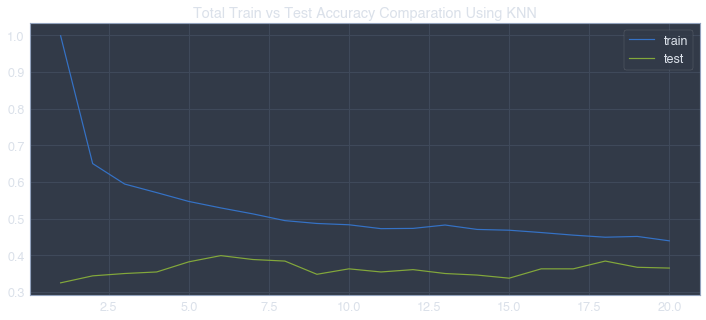

In [10]:
knn_plot(df,'Total Train vs Test Accuracy Comparation Using KNN')

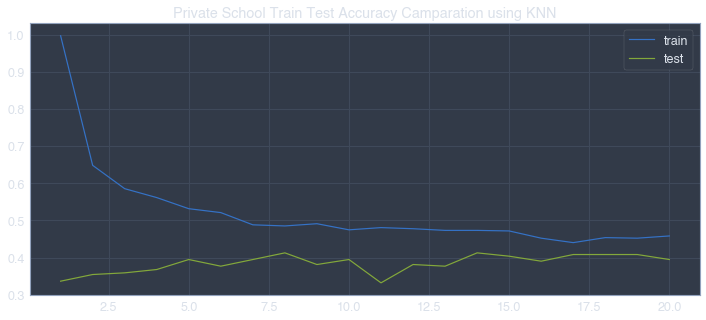

In [11]:
knn_plot(private,'Private School Train Test Accuracy Camparation using KNN')

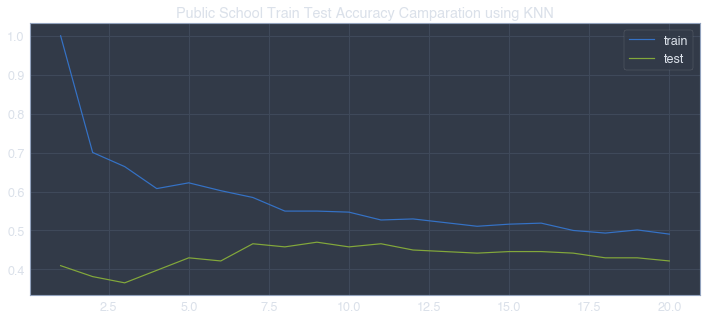

In [12]:
knn_plot(public,'Public School Train Test Accuracy Camparation using KNN')


KNN results shows much better in public school which 7 or 10 should be best in choosing neighbors

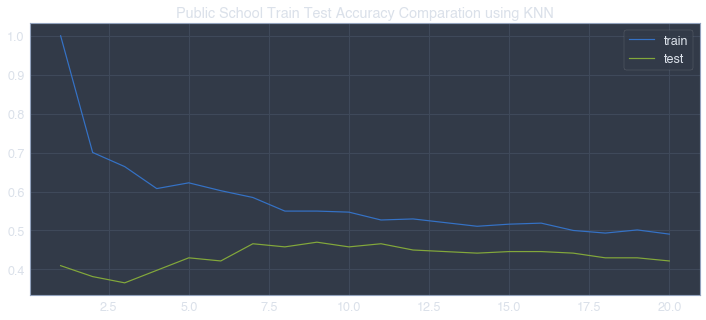

In [13]:
knn_plot(public,'Public School Train Test Accuracy Comparation using KNN')

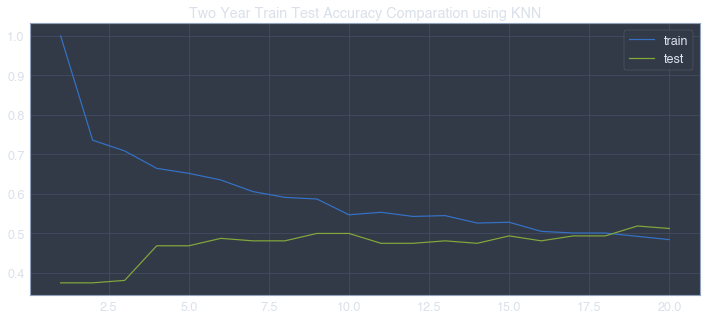

In [14]:
knn_plot(twoyear,'Two Year Train Test Accuracy Comparation using KNN')

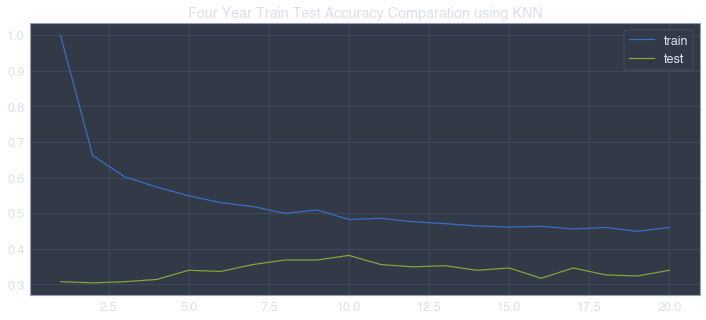

In [15]:
knn_plot(fouryear,'Four Year Train Test Accuracy Comparation using KNN')

Compared to the four year college, two year college seems have better result, but it might because two year college had fewer college numbers

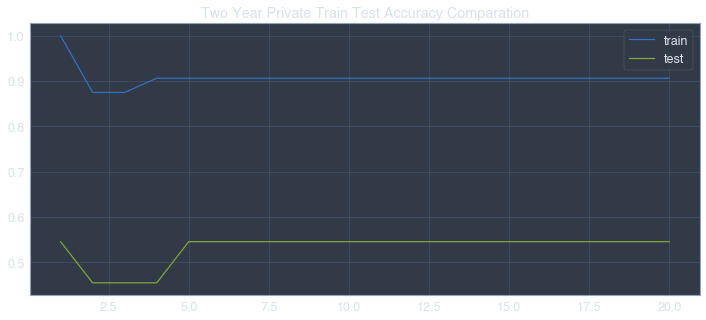

In [16]:
knn_plot(twoyearprivate,'Two Year Private Train Test Accuracy Comparation')

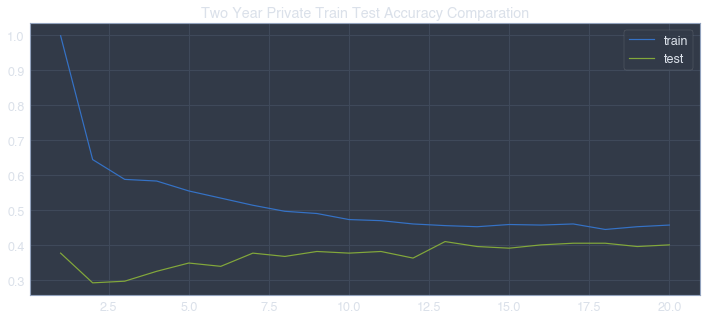

In [17]:
knn_plot(fouryearprivate,'Two Year Private Train Test Accuracy Comparation')

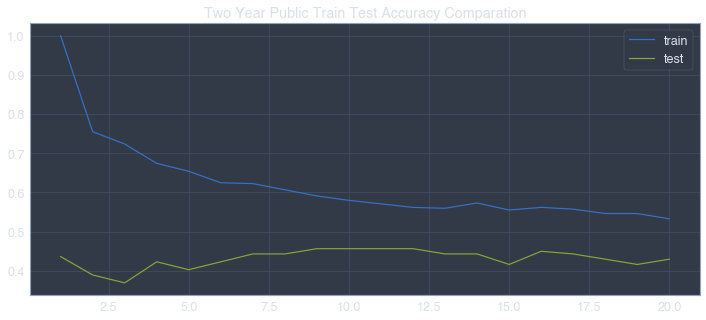

In [18]:
knn_plot(twoyearpublic,'Two Year Public Train Test Accuracy Comparation')

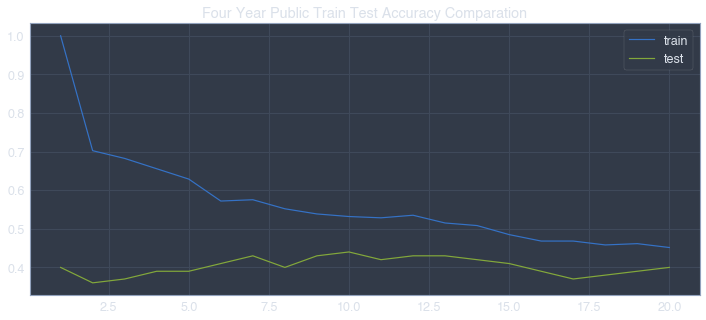

In [19]:
knn_plot(fouryearpublic,'Four Year Public Train Test Accuracy Comparation')

# Summary
- The accuracy of total dataset using knn based on latitutde and longitude within test set is about 0.4
- Public School Situation is better than the Private School; 2-year College test set accuracy is better than 4- year college 
- The higher test set accuracy may due to the sample size 
- Among four categories, two year private school seems have better result, but it have small sample size. 
- 0.4 may seems low in accuracy, but since the random guess of four categories should be around 0.25. The accuracy about 0.4 seems not that bad.